In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [17]:
def abrirImagenesEscaladas( carpeta, escala=32 ):
    # abre todas las imagenes de la carpeta, y las escala de tal forma que midan (escala x escala)px
    # devuelve las imagenes aplanadas -> vectores de tamano escala^2 con valores entre 0 y 1
    imagenes = []

    for dirpath, dirnames, filenames in os.walk(carpeta):
        for file in filenames:
            if file.endswith('DS_Store'):
                continue
            img = Image.open( os.path.join(carpeta, file) )
            img = img.resize((escala, escala))
            img.convert('1')
            img = np.asarray(img)
            if len(img.shape)==3:
                img = img[:,:,0].reshape((escala**2 )) / 255
            else:
                img = img.reshape((escala**2 )) / 255
            
            imagenes.append( img )

    return imagenes

In [18]:
# Data
if(False):
    img_train_sin_neumonia = abrirImagenesEscaladas('./chest_xray/train/NORMAL/')
    img_train_neumonia = abrirImagenesEscaladas('./chest_xray/train/PNEUMONIA/') # NO FUNCIONA :(
    img_test_sin_neumonia = abrirImagenesEscaladas('./chest_xray/test/NORMAL/')
    img_test_neumonia = abrirImagenesEscaladas('./chest_xray/test/PNEUMONIA/')

    data = (img_train_sin_neumonia, img_train_neumonia, img_test_sin_neumonia, img_test_neumonia)


In [19]:
def balancear_datos(imagenes_entrenamiento):

    img_train_sin_neumonia = imagenes_entrenamiento[0]
    img_train_neumonia =imagenes_entrenamiento[1]
    img_test_sin_neumonia =imagenes_entrenamiento[2]
    img_test_neumonia = imagenes_entrenamiento[3]

    # MAX NUMBER OF IMAGES
    n_train = min(len(img_train_sin_neumonia), len(img_train_neumonia))
    n_test = min(len(img_test_sin_neumonia), len(img_test_neumonia))

    # BALANCE
    img_train_sin_neumonia = img_train_sin_neumonia[:n_train]
    img_train_neumonia = img_train_neumonia[:n_train]
    img_test_sin_neumonia = img_test_sin_neumonia[:n_test]
    img_test_neumonia = img_test_neumonia[:n_test]

    
    return (img_train_sin_neumonia, img_train_neumonia, img_test_sin_neumonia, img_test_neumonia)

In [20]:
data = balancear_datos(data)

# EJERCISIO 1

In [21]:
def L(i,w,b):
    """_summary_

    Args:
        i (Vector): imagen reshaped a un vector de tamano 32^2
        w (Vector): Pesos de la red
        b (Float): Bias de la red

    Returns:
        probabolidad: 0 < p < 1: Probabilidad de que la imagen sea un 1 (Tiene neumonia)
    """
    tan = np.tanh(np.dot(w,i)+b)
    return (tan + 1)/2

(1−t0^2)⋅((1+t0)/2−d)⋅i
t0=tanh(b+W⊤⋅i)

In [22]:
# Derivada de L con respecto a W
def L_w(i,w,b,d):
    """_summary_

    Args:
        i (Vector): imagen reshaped a un vector de tamano 32^2
        w (Vector): Pesos de la red
        b (Float): Bias de la red

    Returns:
        Vector: Gradiente de la probabilidad con respecto a los pesos
    """
    # t0=tanh(b+W⊤⋅i)
    #return: (1−t0^2)⋅((1+t0)/2−d)⋅i
    
    t0 = np.tanh(np.dot(w,i)+b)
    return (1-t0**2)*(((1+t0)/2)-d) * i

In [23]:
# Derivada de L con respecto a b
def L_b(i,w,b,d):
    """_summary_

    Args:
        i (Vector): imagen reshaped a un vector de tamano 32^2
        w (Vector): Pesos de la red
        b (Float): Bias de la red

    Returns:
        Float: Gradiente de la probabilidad con respecto al bias
    """
    #t0=tanh(b+W⊤⋅i)
    #(1−t0^2)⋅((1+t0)/2−d)   
    t0 = np.tanh(np.dot(w,i)+b)
    return (1-t0**2)*(((1+t0)/2)-d)

# EJERCISIO 2

In [24]:
def desenso_gradiente(i, w, b, d, alpha=0.1):
    """_summary_

    Args:
        imagenes_entrenamiento (List): Lista de imagenes de tamano 32^2
        w (Vector): Pesos de la red
        b (Float): Bias de la red
        alpha (Float): Learning rate

    Returns:
        Tuple: Pesos y bias actualizados

    """
    w = w - alpha * L_w(i,w,b,d)
    b = b - alpha * L_b(i,w,b,d)
    return w,b



# Ejercisio 3

In [25]:
def train(datos, alpha=0.1, epochs = 5):
    """_summary_

    Args:
        datos (tuple): Tupla de dos listas, la primera con las imagenes Normales y la segunda con las imagenes con Neumonia 
        w (Vector): Pesos de la red
        b (Float): Bias de la red
        alpha (Float): Learning rate
        epochs (Int): Numero de iteraciones

    Returns:
        Tuple: Pesos y bias actualizados
    """
    # inicioamos con pesos aleatorios
    # set numpy seed
    

    datos_sin_neumonia = datos[0]
    datos_con_neumonia = datos[1]

    w = np.random.randn(datos_sin_neumonia[0].shape[0])
    b = np.random.randn(1)
    
    
    print(len(datos_sin_neumonia)+len(datos_con_neumonia))
    
    error = 0
    errores = []
    for _ in range(epochs):  
        error = 0
        for i in datos_sin_neumonia:
            w,b = desenso_gradiente(i,w,b,0,alpha)
            error += (L(i,w,b) - 0)**2 # Falta arreglar esto

        for i in datos_con_neumonia:
            w,b = desenso_gradiente(i,w,b,1,alpha)
            error += (L(i,w,b) - 1)**2 # Falta arreglar esto
        errores.append(error)
        alpha = alpha * 0.95
        print(error)
    
    plt.plot(errores)
    plt.show()

    return w,b

2698
[1348.99902648]
[1348.99895142]
[1348.99886734]
[1348.99877374]
[1348.99866943]
[1348.99855276]
[1348.99842163]
[1348.99827341]
[1348.9981048]
[1348.99791161]
[1348.9976885]
[1348.99742846]
[1348.99712223]
[1348.99675732]
[1348.99631643]
[1348.99577503]
[1348.99509728]
[1348.99422889]
[1348.99308412]
[1348.99152035]
[1348.98928495]
[1348.9858933]
[1348.98031557]
[1348.97004911]
[1348.94783418]
[1348.88754187]
[1348.68524583]
[1348.24017788]
[1348.01384705]
[1348.01079972]
[1348.0072914]
[1348.00700847]
[1348.00676071]
[1348.0065403]
[1348.00634364]
[1348.00616752]
[1348.00600918]
[1348.00586628]
[1348.00573687]
[1348.00561928]
[1348.0055121]
[1348.00541413]
[1348.00532436]
[1348.0052419]
[1348.00516598]
[1348.00509594]
[1348.00503122]
[1348.0049713]
[1348.00491573]
[1348.00486413]
[1348.00481614]
[1348.00477145]
[1348.00472979]
[1348.00469091]
[1348.00465459]
[1348.00462062]
[1348.00458882]
[1348.00455903]
[1348.0045311]
[1348.0045049]
[1348.00448029]
[1348.00445718]
[1348.0044354

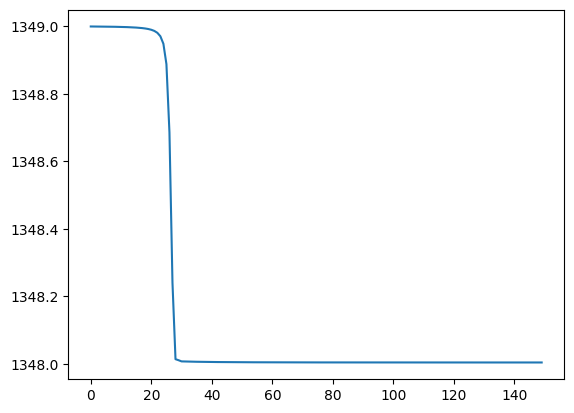

In [29]:
train_sin, train_con, test_sin, test_con = data

w_res, b_res = train(
    (train_sin, train_con),
    alpha=0.1,
    epochs = 150
    )